<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

import timeit

In [3]:
#randomstate
SEED = 12345

## Загрузка данных

In [4]:
# Загрузим датасеты с помощью конструкции обработки исключений
try:
    df = pd.read_csv('/datasets/insurance.csv')
    print('Прочитан файл с данными: df' )
except:
    print(repr(err))

Прочитан файл с данными: df


In [5]:
#создам функцию для обзора датасетов
def info_df(data):
    display(data.head(10))
    data.info()
    display(df.describe().T)
    print('Дубликаты:', data.duplicated().sum())
    return data

In [6]:
 info_df(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


Дубликаты: 153


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [7]:
# Заменим имена столбцов 

df.rename(columns={'Пол': 'gender', 'Возраст': 'age', 'Зарплата':'solary', 'Члены семьи':'family_members',
                   'Страховые выплаты': 'insurance_payments'}, inplace=True)

In [8]:
df.head(2)

,gender,age,solary,family_members,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1


In [9]:
# Заменим тип данных на int в признаках возраст и зарплата

df[['age', 'solary']] = df[['age', 'solary']].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   solary              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_payments  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [11]:
df.sample(10)

,gender,age,solary,family_members,insurance_payments
4688,1,36,36400,0,0
3580,0,37,39200,0,0
1314,0,22,47700,0,0
4448,0,47,37900,2,1
1095,0,25,11300,2,0
1762,0,33,28400,3,0
1849,1,18,39200,2,0
2794,1,34,42900,1,0
1070,0,28,42300,0,0
3415,0,20,41900,2,0


In [12]:
# Посмотрим на дубликаты

dup_rows = df[df.duplicated()]
print("\n\nПовторяющиеся строки : \n {}".format(dup_rows))



Повторяющиеся строки : 
       gender  age  solary  family_members  insurance_payments
281        1   39   48100               1                   0
488        1   24   32900               1                   0
513        0   31   37400               2                   0
718        1   22   32600               1                   0
785        0   20   35800               0                   0
...      ...  ...     ...             ...                 ...
4793       1   24   37800               0                   0
4902       1   35   38700               1                   0
4935       1   19   32700               0                   0
4945       1   21   45800               0                   0
4965       0   22   40100               1                   0

[153 rows x 5 columns]


In [13]:
# Удалим добуликаты

df.drop_duplicates(inplace=True)
print('Дубликатов:', df.duplicated().sum())

Дубликатов: 0


In [14]:
df.shape

(4847, 5)

In [15]:
#Напишем функцию построения гистограммы

def hist(col):
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(10,7))
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Частота', fontsize=16)
    sns_plot = sns.distplot(df[col], color='green', bins=15)
    plt.title('Гистограмма частот')
       

In [16]:
#Напишем функцию построения диаграммы размаха

def boxplot(col):
    plt.figure(figsize=(11,7))
    sns.boxplot(x=df[col], width=0.5, color='#8fc1da')
    plt.title('Диаграмма размаха')
    plt.xlabel(col, fontsize=16)
    plt.show()

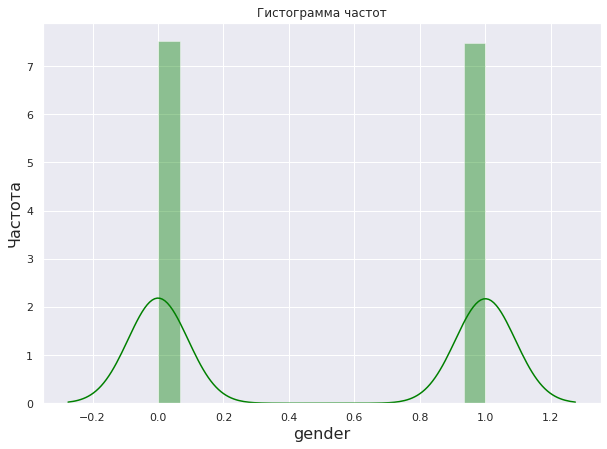

In [17]:
hist('gender')

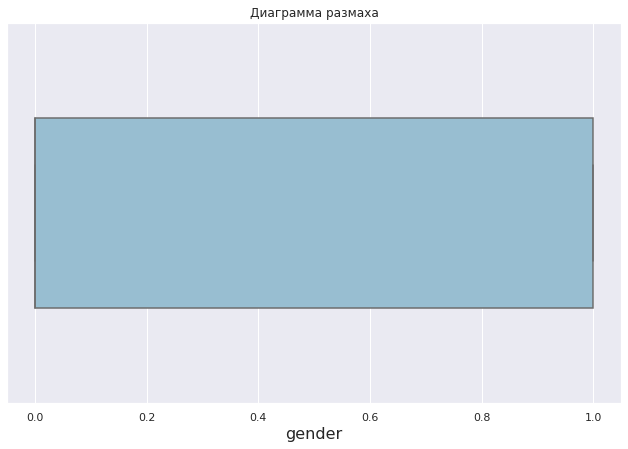

In [18]:
boxplot('gender')

Распределение по полу равномерное

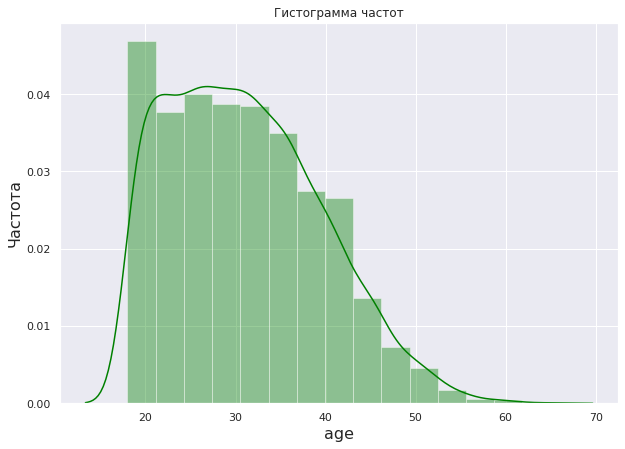

In [19]:
hist('age')

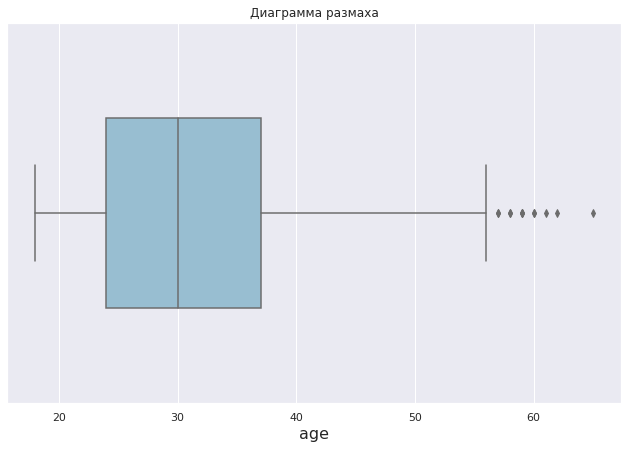

In [20]:
boxplot('age')

Основная часть клиентов в возрасте от 24 до 38 лет. Есть выбросы. Но так как важны все клиенты чисить от выбросов данные не будем.

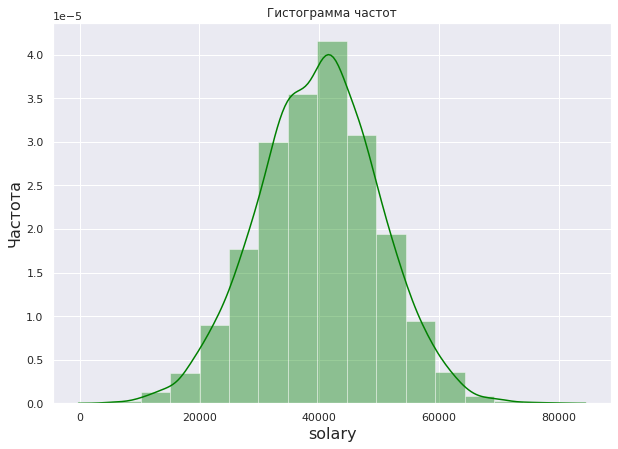

In [21]:
hist('solary')

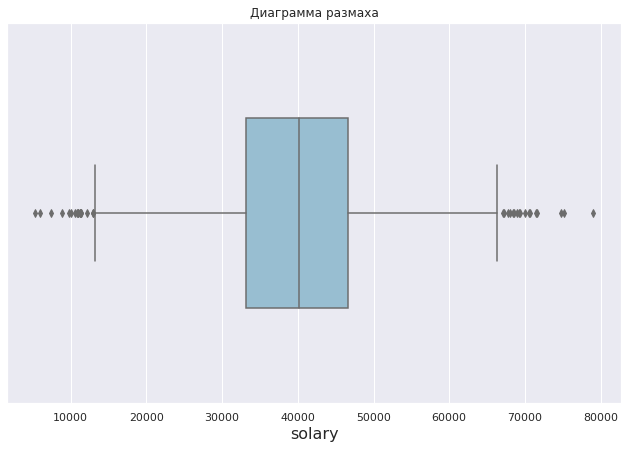

In [22]:
boxplot('solary')

Данные имеют нормальное распределение. Оставим все данные для обучения.

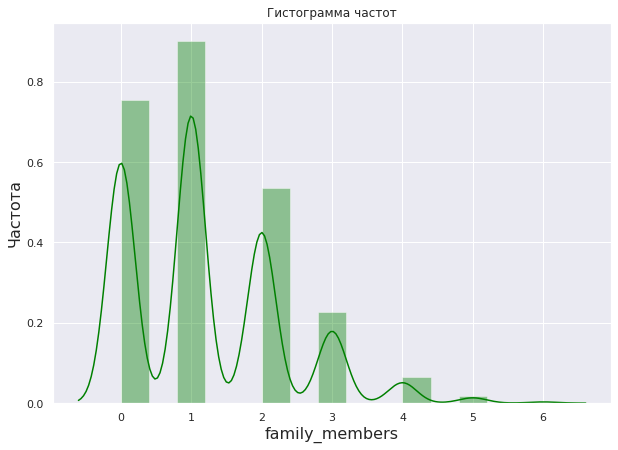

In [23]:
hist('family_members')

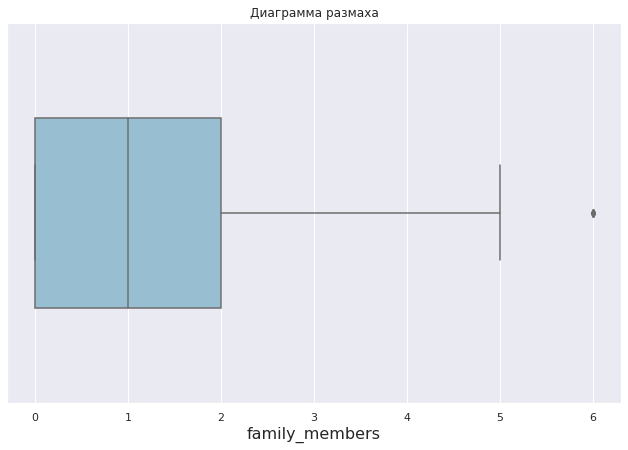

In [24]:
boxplot('family_members')

Данные по количеству челенов семьи тоже соханим. Непонятен столбец с нулевым значением. Возможно этот признак не про членов семьи, а про количество детей в семье. Оставим данные как есть.

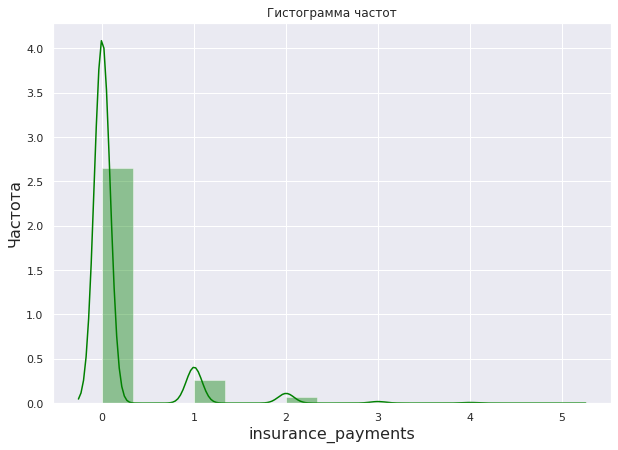

In [25]:
hist('insurance_payments')

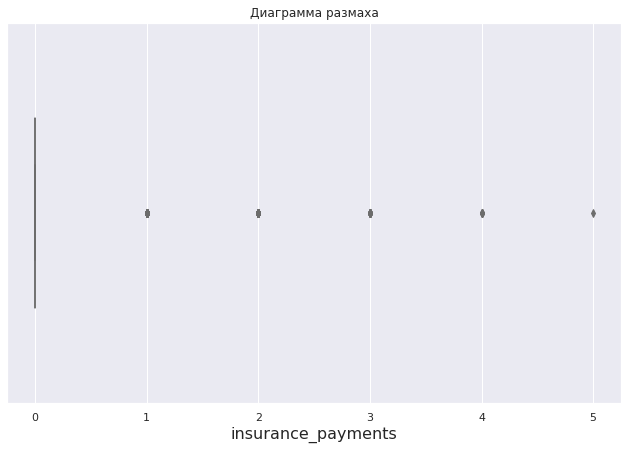

In [26]:
boxplot('insurance_payments')

Этот признак оставим как есть.

**Вывод:**

- провели выгрузку данных
- сделали обзор данных
- нашшли и удалили дубликаты
- пропусков не обнаружили
- переименовали столбцы
- преобразовали типы данных
- посмотрели на распределение признаков

## Умножение матриц



Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.



Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Предсказания:**

$$
a = Xw
$$

где $X$ - матрица признаков, а $w = (X^T X)^{-1} X^T y$ - матрица весов



**Задача обучения:**

$$
w = \arg\min_w MSE(Xw, y)
$$

**Формула обучения:**

$$
w = (X^T X)^{-1} X^T y
$$

**Проверим следующее:** 

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
Иными словами, если матрицу $X$ умножим на обратимую матрицу $P$, то при вычислении весов линейной регрессии $w$ предсказания $ a = Xw $ не изменятся

**Ответ:** Предсказания не изменятся

**Обоснование:**   
- Предсказания на новых признаках будут $a_p = X_pw_p$   
- Матрица весов $w_p = (X_p^T X_p)^{-1} X_p^T y$

- - -

**Свойства матриц:**

$(AB)^{-1} = B^{-1}A^{-1}$ - для обратимых матриц  
$(AB)^T = B^TA^T$ - при транспонировании матриц  
$AA^{-1} = E$ - произведение прямой и обратной матрицы приводит к единице  

- - -

Подставим в формулу расчета весов $ w = (X^T X)^{-1} X^T y $ вместо матрицы $X$ произведение матрицы $X$ на обратимую матрицу $P$

$$w_p = ((XP)^T(XP)^{-1}(XP)^Ty$$

1. Раскрываем скобки. Если определено произведение AB (т.е. количество строк A равен количеству столбцов B ), то $(AB)^T=B^TA^T$
$$w_p = (P^TX^TXP)^{-1}P^TX^Ty$$

2. Раскроем обратные матрицы 
$$w_p = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$  


3. Перемножение прямой и обратной матрицы дает единицу. $AA^{-1} = E$  
По условию, P - обратимая матрица. Следовательно, $(P^T)^{-1}P^T$ даёт единичную матрицу $E$

$$w_p = P^{-1}(X^TX)^{-1}EX^Ty$$ 
$$w_p = P^{-1}(X^TX)^{-1}X^Ty$$ 

4. Полученная в третьем пункте формула в части состоит из исходной формулы обучения $w$, подставим ее в формулу $w_p$
$$w_p = P^{-1}w$$ 


5. Составим формулу предсказания на новых признаках
$$a_p = XPP^{-1}w$$


6. В формуле приcутсвует произведение прямой и обратной матрицы $PP^{-1}$, на остновании этого преобразум формулу.
$$a_p = XEw$$


7. В правой части равенства сокращаем единицу и получем значение исходной формулы предсказания $a$
$$a_p = a$$


При умножении матрицы признаков $X$ на обратимую матрицу $P$, предсказания модели останутся такими же, как на исходной матрице.

**Вывод**

В теоритеческих рассчетах результат предсказаний не меняется. Но в связи с изменением признаков и матрицы весов целевая зависимая переменная будет формироваться новыми взаимосвязями, поэтому нужно переобучить модель.

## Алгоритм преобразования

**Алгоритм**
- Разделим выборку
- Обучим модель на исходных данных
- Получим R2

- Создадим модифицированную матрицу
- Раделим ее на выбрки
- Заново обучим модель
- Получим R2

Сравним результаты R2 полученные на исходных данных и на модифицированных

**Обоснование**

Если R2 на исходных и модифицированнх данных равны, то подтверждаем, что при умножении матрицы признаков  𝑋  на обратимую матрицу  𝑃 , предсказания модели останутся такими же. 

## Проверка алгоритма

In [27]:
features = df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

In [28]:
features_train, features_valid, target_train, target_valid \
= train_test_split(features, target, test_size=0.25, random_state=SEED)
model = LinearRegression()
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print('R2 на исходных данных :', r2_score(target_valid, predictions_valid))

R2 на исходных данных : 0.4230772761583642


In [29]:
features_train.shape

(3635, 4)

In [30]:
features_valid.shape

(1212, 4)

In [31]:
# Создадим обратимую матрицу  P

matrix_p = np.random.rand(features.shape[1], features.shape[1])
print('Обратимая матрица P:')
print(matrix_p)


Обратимая матрица P:
[[0.35495439 0.36473468 0.92493686 0.5149289 ]
 [0.9658695  0.37803194 0.16293552 0.68143889]
 [0.24281511 0.88524463 0.83199906 0.94931737]
 [0.15493852 0.33634613 0.66029188 0.63352102]]


In [32]:
# Проверим обратимую матрицуу обратной

invert_p = np.linalg.inv(matrix_p)
print('Обратная матрица к P:')
print(invert_p)

Обратная матрица к P:
[[ 1.16839939  0.92067069 -0.31920043 -1.46167353]
 [ 0.68030173 -0.22783466  2.46973469 -4.00872829]
 [ 1.7263877  -0.4894771  -0.39281401 -0.28809308]
 [-2.44627509  0.40595606 -0.82374118  4.36452018]]


In [33]:
# Создадим модифицированную матрицу

def modif_matrix(features_train, features_valid):
    modif_matrix_train = features_train.dot(matrix_p)
    modif_matrix_valid = features_valid.dot(matrix_p)
    return modif_matrix_train, modif_matrix_valid


modif_matrix_train, modif_matrix_valid = modif_matrix(features_train, features_valid)

In [34]:
modif_matrix_train.shape

(3635, 4)

In [35]:
modif_matrix_valid.shape

(1212, 4)

In [36]:
# Заново обучим модель и проверим ее работу 

model = LinearRegression()
model.fit(modif_matrix_train, target_train)
predictions_valid_modif = model.predict(modif_matrix_valid)
print('R2 на модифицированных данных:', r2_score(target_valid, predictions_valid_modif))

R2 на модифицированных данных: 0.4230772761583207


**Вывод:**

Предсказания не изменились, прогоноз подтвердился. 